# Atv Desafio EDA 

Dessa netflix_daily_top_10.csv base, analise e extraia:

- Tipos de dados disponíveis
- Período da análise feita
- Tamanho da base de dados
- Verificar dados nulos
- Outliers

In [99]:
import pandas as pd

import matplotlib as plt


In [100]:
df_netflix = pd.read_csv(r"C:\Projetos\Cursos\LMM\atv_eda_llm\netflix_daily_top_10.csv")

In [101]:
#Transformar dados para numerico e formato de date
df_netflix.Rank = pd.to_numeric(df_netflix.Rank, errors= 'coerce')
df_netflix["As of"] = pd.to_datetime(df_netflix["As of"], errors = 'coerce')
df_netflix["Year to Date Rank"] = pd.to_numeric(df_netflix["Year to Date Rank"], errors= 'coerce')
df_netflix["Last Week Rank"] = pd.to_numeric(df_netflix["Last Week Rank"], errors = 'coerce')
df_netflix["Netflix Release Date"] = pd.to_datetime(df_netflix["Netflix Release Date"], errors = 'coerce')
df_netflix["Days In Top 10"] = pd.to_numeric(df_netflix["Days In Top 10"], errors = 'coerce')
df_netflix["Viewership Score"] = pd.to_numeric(df_netflix["Viewership Score"], errors = 'coerce')

## Tipo de Dados disponiveis

In [102]:
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   As of                 7100 non-null   datetime64[ns]
 1   Rank                  7100 non-null   int64         
 2   Year to Date Rank     6241 non-null   float64       
 3   Last Week Rank        3132 non-null   float64       
 4   Title                 7100 non-null   object        
 5   Type                  7100 non-null   object        
 6   Netflix Exclusive     4599 non-null   object        
 7   Netflix Release Date  7100 non-null   datetime64[ns]
 8   Days In Top 10        7100 non-null   int64         
 9   Viewership Score      7100 non-null   int64         
dtypes: datetime64[ns](2), float64(2), int64(3), object(3)
memory usage: 554.8+ KB


In [103]:
df_netflix.dtypes

As of                   datetime64[ns]
Rank                             int64
Year to Date Rank              float64
Last Week Rank                 float64
Title                           object
Type                            object
Netflix Exclusive               object
Netflix Release Date    datetime64[ns]
Days In Top 10                   int64
Viewership Score                 int64
dtype: object

## Periodo da analise feita

In [104]:
# Data inicial das analises
dataFirstAnalyze = min(df_netflix['As of'])
dataFirstAnalyze

Timestamp('2020-04-01 00:00:00')

In [105]:
# Data final das analises
dataLastAnalyse = max(df_netflix['As of'])
dataLastAnalyse

Timestamp('2022-03-11 00:00:00')

## Tamanho do BD

In [106]:
#Quantidade de linhas no BD
quantLinhas = df_netflix.shape[0]
quantLinhas

7100

In [107]:
#Quantidade de colunas no BD
quantColunas = df_netflix.shape[1]
quantColunas

10

## Verificar Dados Nulos

In [108]:
# Quantidade linhas com valores nulos por coluna
df_netflix.isna().sum()

As of                      0
Rank                       0
Year to Date Rank        859
Last Week Rank          3968
Title                      0
Type                       0
Netflix Exclusive       2501
Netflix Release Date       0
Days In Top 10             0
Viewership Score           0
dtype: int64

In [109]:
# Linhas com valores nulos 
df_netflix[df_netflix.isna().any(axis=1)]

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
1,2020-04-01,2,2.0,NaN,Ozark,TV Show,Yes,2017-07-21,5,45
2,2020-04-01,3,3.0,2.0,All American,TV Show,NaN,2019-03-28,9,76
3,2020-04-01,4,4.0,NaN,Blood Father,Movie,NaN,2020-03-26,5,30
5,2020-04-01,6,6.0,NaN,Car Masters: Rust to Riches,TV Show,Yes,2018-09-14,4,14
6,2020-04-01,7,10.0,NaN,Unorthodox,TV Show,Yes,2020-03-26,2,5
...,...,...,...,...,...,...,...,...,...,...
7091,2022-03-11,2,1.0,NaN,Pieces of Her,TV Show,Yes,2022-03-04,7,68
7092,2022-03-11,3,3.0,NaN,Good Girls,TV Show,NaN,2019-01-01,26,149
7097,2022-03-11,8,8.0,NaN,Shooter,Movie,NaN,2014-08-01,3,7
7098,2022-03-11,9,9.0,7.0,Shrek 2,Movie,NaN,2022-03-01,10,33


In [110]:
# DateFrame sem linhas com valores nulos 
df_netflix_notNull = df_netflix.dropna(axis=0)
df_netflix_notNull

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1.0,1.0,"Tiger King: Murder, Mayhem …",TV Show,Yes,2020-03-20,9,90
4,2020-04-01,5,5.0,4.0,The Platform,Movie,Yes,2020-03-20,9,55
7,2020-04-01,8,7.0,5.0,Love is Blind,TV Show,Yes,2020-02-13,9,40
10,2020-04-02,1,1.0,1.0,"Tiger King: Murder, Mayhem …",TV Show,Yes,2020-03-20,10,100
18,2020-04-02,9,5.0,4.0,The Platform,Movie,Yes,2020-03-20,10,57
...,...,...,...,...,...,...,...,...,...,...
7086,2022-03-10,7,6.0,2.0,Vikings: Valhalla,TV Show,Yes,2022-02-25,13,96
7093,2022-03-11,4,4.0,3.0,Inventing Anna,TV Show,Yes,2022-02-11,28,250
7094,2022-03-11,5,6.0,6.0,Love is Blind,TV Show,Yes,2020-02-13,46,312
7095,2022-03-11,6,5.0,1.0,Worst Roommate Ever,TV Show,Yes,2022-03-01,10,81


## Outliers

    

<Axes: >

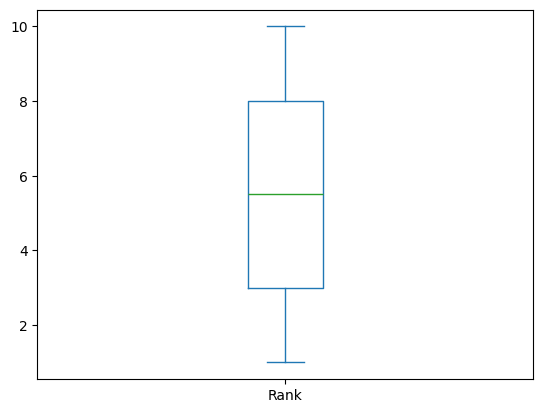

In [111]:
df_netflix["Rank"].plot.box()

<Axes: >

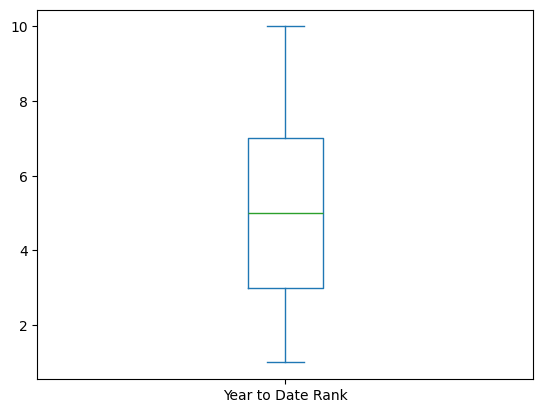

In [112]:
df_netflix["Year to Date Rank"].plot.box()

<Axes: >

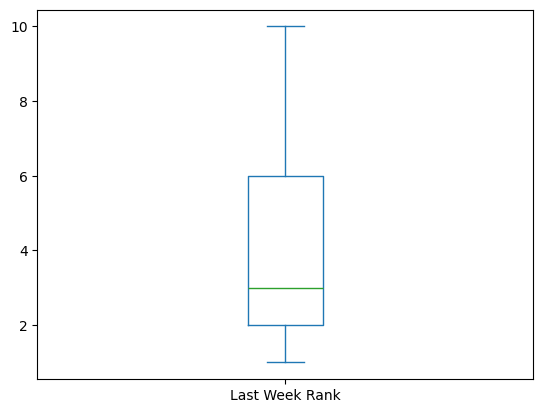

In [113]:
df_netflix["Last Week Rank"].plot.box()

<Axes: >

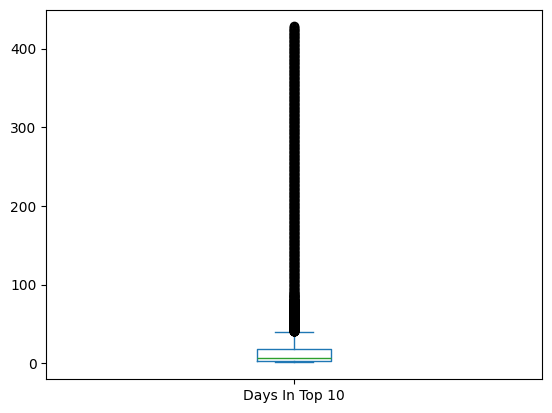

In [114]:
df_netflix["Days In Top 10"].plot.box()

In [115]:
#Calculo IQR 

q1_daysInTop10 = df_netflix["Days In Top 10"].quantile(0.25)
q3_daysInTop10 = df_netflix["Days In Top 10"].quantile(0.75)
iqr_daysInTop10 = q3_daysInTop10 - q1_daysInTop10
iqr_daysInTop10

np.float64(15.0)

In [116]:
# Calculos limites
limInf_daysInTop10 = q1_daysInTop10 - (iqr_daysInTop10 * 1.5)
limSup_daysInTop10 = q3_daysInTop10 + (iqr_daysInTop10 * 1.5)
limInf_daysInTop10, limSup_daysInTop10

(np.float64(-19.5), np.float64(40.5))

In [117]:
#Outlier da coluna "Days In Top 10"
df_netflix[(df_netflix["Days In Top 10"] < limInf_daysInTop10) | (df_netflix["Days In Top 10"] > limSup_daysInTop10)]

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
438,2020-05-14,9,9.0,NaN,Ozark,TV Show,Yes,2017-07-21,41,256
447,2020-05-15,8,9.0,10.0,Ozark,TV Show,Yes,2017-07-21,42,259
458,2020-05-16,9,8.0,NaN,Ozark,TV Show,Yes,2017-07-21,43,261
489,2020-05-19,10,NaN,7.0,Ozark,TV Show,Yes,2017-07-21,44,262
629,2020-06-02,10,NaN,NaN,Outer Banks,TV Show,Yes,2020-04-15,41,291
...,...,...,...,...,...,...,...,...,...,...
7053,2022-03-07,4,3.0,4.0,Love is Blind,TV Show,Yes,2020-02-13,42,288
7063,2022-03-08,4,4.0,4.0,Love is Blind,TV Show,Yes,2020-02-13,43,295
7074,2022-03-09,5,4.0,5.0,Love is Blind,TV Show,Yes,2020-02-13,44,301
7085,2022-03-10,6,5.0,5.0,Love is Blind,TV Show,Yes,2020-02-13,45,306


<Axes: >

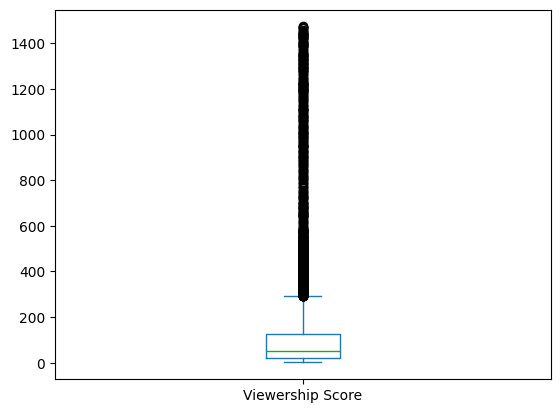

In [118]:
df_netflix["Viewership Score"].plot.box()

In [119]:
# Calculo iqr
q1_ViewershipScore = df_netflix["Viewership Score"].quantile(0.25)
q3_ViewershipScore = df_netflix["Viewership Score"].quantile(0.75)
iqr_ViewershipScore = q3_ViewershipScore - q1_ViewershipScore
iqr_ViewershipScore

np.float64(109.0)

In [120]:
# Calculo limites
limInf_ViewershipScore = q1_ViewershipScore - (iqr_ViewershipScore * 1.5)
limSup_ViewershipScore = q3_ViewershipScore + (iqr_ViewershipScore * 1.5)
limInf_ViewershipScore, limSup_ViewershipScore

(np.float64(-144.5), np.float64(291.5))

In [121]:
#Outliner da coluna Viewership Score
df_netflix[(df_netflix["Viewership Score"] < limInf_ViewershipScore) | (df_netflix["Viewership Score"] > limSup_ViewershipScore)]

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
236,2020-04-24,7,7.0,2.0,"Tiger King: Murder, Mayhem …",TV Show,Yes,2020-03-20,32,292
247,2020-04-25,8,7.0,2.0,"Tiger King: Murder, Mayhem …",TV Show,Yes,2020-03-20,33,295
255,2020-04-26,6,8.0,3.0,"Tiger King: Murder, Mayhem …",TV Show,Yes,2020-03-20,34,300
269,2020-04-27,10,6.0,4.0,"Tiger King: Murder, Mayhem …",TV Show,Yes,2020-03-20,35,301
2382,2020-11-25,3,2.0,3.0,The Queenâs Gambit,TV Show,Yes,2020-10-23,33,296
...,...,...,...,...,...,...,...,...,...,...
7008,2022-03-02,9,6.0,3.0,Sweet Magnolias,TV Show,Yes,2020-05-19,45,344
7063,2022-03-08,4,4.0,4.0,Love is Blind,TV Show,Yes,2020-02-13,43,295
7074,2022-03-09,5,4.0,5.0,Love is Blind,TV Show,Yes,2020-02-13,44,301
7085,2022-03-10,6,5.0,5.0,Love is Blind,TV Show,Yes,2020-02-13,45,306
